In [1]:
import tensorflow  as tf

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
X_train = X_train / 255.0 # (0~255) => (0.0, 1.0)

In [10]:
X_test = X_test / 255.0

In [11]:
# MLP : 입력층 => 은닉층1(300) -> 은닉층2(100) -> 출력층(10)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
#모형 컴파일 : 비용(손실)함수, 최적화 알고리즘, 지표를 설정
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7143 - accuracy: 0.7655 - val_loss: 0.5204 - val_accuracy: 0.8177
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4863 - accuracy: 0.8311 - val_loss: 0.4604 - val_accuracy: 0.8337
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4406 - accuracy: 0.8465 - val_loss: 0.4499 - val_accuracy: 0.8377
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4137 - accuracy: 0.8564 - val_loss: 0.4166 - val_accuracy: 0.8543
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3954 - accuracy: 0.8616 - val_loss: 0.4034 - val_accuracy: 0.8592
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3791 - accuracy: 0.8674 - val_loss: 0.4483 - val_accuracy: 0.8387
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3652 - accuracy: 0.8713 - val_loss: 0.3825 - val_accuracy:

In [14]:
import pandas as pd

<AxesSubplot:>

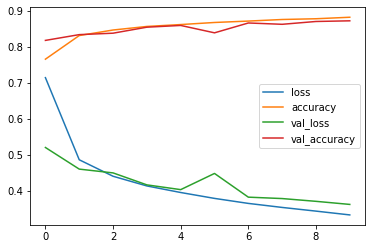

In [15]:
pd.DataFrame(history.history).plot()

In [16]:
model.predict(X_test[:3])

array([[5.1227529e-05, 1.6895205e-05, 1.9942285e-05, 2.6150790e-05,
        3.2832551e-05, 5.3882238e-02, 8.7301167e-05, 9.4899826e-02,
        2.7713142e-03, 8.4821224e-01],
       [2.2680085e-04, 7.6862199e-07, 9.5393753e-01, 2.7864420e-05,
        4.0406357e-03, 9.5071628e-10, 4.1762948e-02, 3.2514927e-10,
        3.5268783e-06, 2.0654281e-09],
       [7.5013268e-05, 9.9988842e-01, 3.6059796e-06, 1.7814324e-05,
        1.2780969e-05, 1.3328823e-10, 4.3960125e-07, 3.5550528e-07,
        1.6309198e-06, 4.0906154e-09]], dtype=float32)

In [17]:
import numpy as np

In [18]:
np.argmax(model.predict(X_test[:3]), axis=1)

array([9, 2, 1], dtype=int64)

In [19]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3819 - accuracy: 0.8632


[0.38187307119369507, 0.8632000088691711]

In [21]:
p = np.argmax(model.predict(X_test), axis=1)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_test, p)

array([[792,   0,   7,  42,   3,   2, 146,   0,   8,   0],
       [  3, 961,   1,  26,   3,   0,   5,   0,   1,   0],
       [ 14,   1, 735,  21,  93,   1, 132,   0,   3,   0],
       [ 17,  10,   2, 912,  15,   0,  40,   0,   4,   0],
       [  0,   1,  83,  59, 736,   1, 115,   0,   5,   0],
       [  0,   0,   0,   1,   0, 951,   0,  35,   1,  12],
       [115,   1,  66,  43,  53,   1, 709,   0,  12,   0],
       [  0,   0,   0,   0,   0,  29,   0, 946,   0,  25],
       [  3,   2,   6,  10,   5,   3,  18,   6, 947,   0],
       [  0,   0,   0,   0,   0,  12,   1,  44,   0, 943]], dtype=int64)